## Mohammed AL-Sayed Agoor

-----------

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20,50)
y = -1 * X + 2

In [3]:
X = X.reshape(-1,1)
X = np.insert(arr=X, obj=0, values=1, axis=1)

#### Plot your data points. 

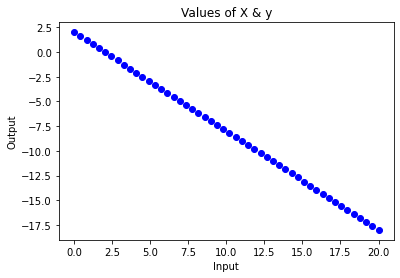

In [4]:
plt.scatter(X[:,1], y, c='b')
plt.title('Values of X & y')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

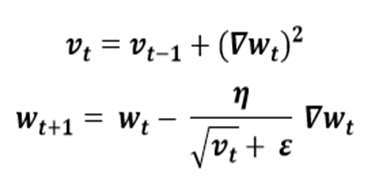

In [5]:
thetas_adag = np.zeros(2)

In [6]:
def adagrad(X, y, theta_input, alfa, epsilon):
    
    cost_steps = []
    theta_steps = []
    h_teta_steps = []
    
    
    vt = 0
    
    # first calculations
    h_theta = X @ theta_input     

    loss = h_theta - y

    cost = np.sum(loss**2) / (2 * len(X))

    gradient = (X.T @ loss) / len(X)
    
    vt = vt + (gradient)**2

    theta_input = theta_input - ((alfa * gradient) / (np.sqrt(vt)+epsilon))


    cost_steps.append(cost)
    theta_steps.append(theta_input)
    h_teta_steps.append(h_theta)
    
   
    
    while (gradient[0] > 0.01 or gradient[0] > -0.01) and (gradient[1] > 0.01 or gradient[1] > -0.01): 
        
        h_theta = X @ theta_input     
        
        loss = h_theta - y
        
        cost = np.sum(loss**2) / (2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        vt = vt + (gradient)**2
        
        theta_input = theta_input - ((alfa * gradient) / (np.sqrt(vt)+epsilon))
        
        # append in array
        cost_steps.append(cost)
        theta_steps.append(theta_input)
        h_teta_steps.append(h_theta)
    
    return theta_input, theta_steps, cost_steps, h_teta_steps  

## trial 1 using Adagrad

In [7]:
theta_adag1, theta_steps_adag1, cost_steps_adag1, h_steps_adag1 = adagrad(X, y, thetas_adag, 0.01, 1e-8)

In [8]:
print('theta_adag1 :', theta_adag1)

theta_adag1 : [-0.64440544 -0.73662222]


In [9]:
vals_adag1 = X @ theta_adag1
vals_adag1

array([ -0.64440544,  -0.94506757,  -1.2457297 ,  -1.54639183,
        -1.84705396,  -2.14771609,  -2.44837822,  -2.74904035,
        -3.04970248,  -3.35036461,  -3.65102674,  -3.95168887,
        -4.252351  ,  -4.55301313,  -4.85367526,  -5.15433739,
        -5.45499952,  -5.75566165,  -6.05632378,  -6.35698591,
        -6.65764804,  -6.95831017,  -7.2589723 ,  -7.55963443,
        -7.86029656,  -8.16095869,  -8.46162082,  -8.76228295,
        -9.06294508,  -9.36360721,  -9.66426934,  -9.96493147,
       -10.2655936 , -10.56625573, -10.86691786, -11.16757999,
       -11.46824212, -11.76890425, -12.06956638, -12.37022851,
       -12.67089064, -12.97155277, -13.2722149 , -13.57287703,
       -13.87353916, -14.17420129, -14.47486342, -14.77552555,
       -15.07618768, -15.37684981])

### r2_score1

In [10]:
score_adag1 = r2_score(y, vals_adag1)
print('score_adag1 :', score_adag1)   

score_adag1 : 0.9306288886615207


In [11]:
theta_steps_adag1 = np.asarray(theta_steps_adag1)
print('theta_steps_adag1 : \n', theta_steps_adag1)

theta_steps_adag1 : 
 [[-0.01       -0.01      ]
 [-0.01702195 -0.01702604]
 [-0.02273074 -0.02274025]
 ...
 [-0.64440681 -0.73654524]
 [-0.64440614 -0.73658374]
 [-0.64440544 -0.73662222]]


### cost vs. epochs

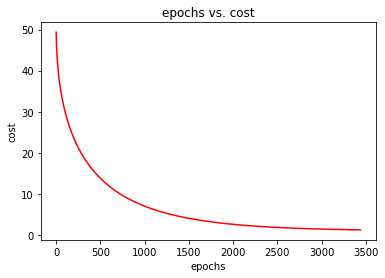

In [12]:
iters = np.arange(len(cost_steps_adag1))
plt.plot(iters, cost_steps_adag1, c='r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('epochs vs. cost');

### cost vs. theta0 and theta1

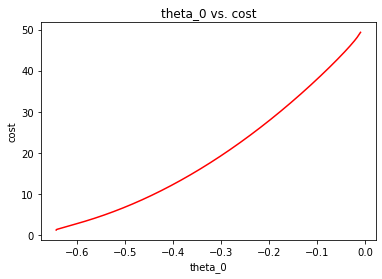

In [13]:
plt.plot(theta_steps_adag1[:,0], cost_steps_adag1, c='r')
plt.title('theta_0 vs. cost')
plt.xlabel('theta_0')
plt.ylabel('cost');

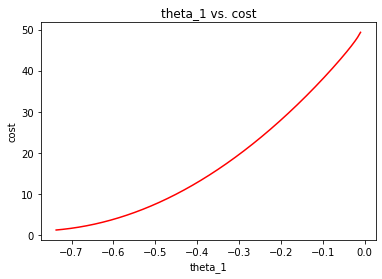

In [14]:
plt.plot(theta_steps_adag1[:,1], cost_steps_adag1, c='r')
plt.title('theta_1 vs. cost')
plt.xlabel('theta_1')
plt.ylabel('cost');

### predict all Lines with diffrent thetas

In [15]:
def predict_each_line(theta_steps):
    
    predict_each = []
    
    for i in range(len(theta_steps)):
        final_vals = theta_steps[i,0] * X[:,0] + theta_steps[i,1] * X[:,1]
        predict_each.append(final_vals)
        
    predict_each = np.array(predict_each)
    return predict_each

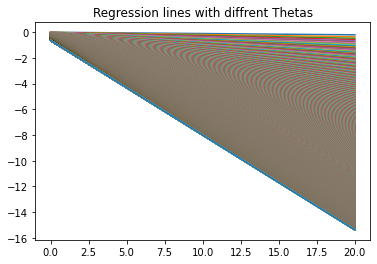

In [16]:
def plot_lines(theta_steps):
    
    predict_each = predict_each_line(theta_steps)
    for i in range (predict_each.shape[0]):
        
        plt.plot(X[:,1], predict_each[i])
        plt.title('Regression lines with diffrent Thetas');
        
plot_lines(theta_steps_adag1)

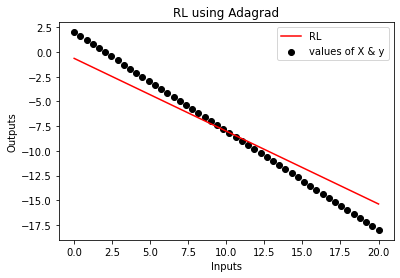

In [17]:
plt.scatter(X[:,1], y, c='k', label='values of X & y')
plt.plot(X[:,1], vals_adag1, c='r', label='RL')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('RL using Adagrad')
plt.legend();

## trial 2 using Adagrad

In [18]:
thetas_adag2 = np.zeros(2)

In [19]:
theta_adag2, theta_steps_adag2, cost_steps_adag2, h_step_adag = adagrad(X, y, thetas_adag2, 0.5, 1e-8)

In [20]:
print('theta_adag2 :', theta_adag2)

theta_adag2 : [-0.67838852 -0.77486181]


In [21]:
theta_steps_adag2 = np.asarray(theta_steps_adag2)
print('h_thetas_steps_adag \n', theta_steps_adag2)

h_thetas_steps_adag 
 [[-0.5        -0.5       ]
 [-0.6491375  -0.67318139]
 [-0.68596652 -0.74414247]
 [-0.67838852 -0.77486181]]


In [22]:
theta_steps_adag2 = np.asarray(theta_steps_adag2)
print('theta_steps_adag : \n', theta_steps_adag2)

theta_steps_adag : 
 [[-0.5        -0.5       ]
 [-0.6491375  -0.67318139]
 [-0.68596652 -0.74414247]
 [-0.67838852 -0.77486181]]


In [23]:
vals_adag2 = X @ theta_adag2

In [24]:
print('vals_adag2 : \n', vals_adag2)

vals_adag2 : 
 [ -0.67838852  -0.99465864  -1.31092877  -1.62719889  -1.94346902
  -2.25973914  -2.57600927  -2.89227939  -3.20854952  -3.52481964
  -3.84108977  -4.15735989  -4.47363002  -4.78990015  -5.10617027
  -5.4224404   -5.73871052  -6.05498065  -6.37125077  -6.6875209
  -7.00379102  -7.32006115  -7.63633127  -7.9526014   -8.26887153
  -8.58514165  -8.90141178  -9.2176819   -9.53395203  -9.85022215
 -10.16649228 -10.4827624  -10.79903253 -11.11530265 -11.43157278
 -11.74784291 -12.06411303 -12.38038316 -12.69665328 -13.01292341
 -13.32919353 -13.64546366 -13.96173378 -14.27800391 -14.59427403
 -14.91054416 -15.22681428 -15.54308441 -15.85935454 -16.17562466]


### r2_score2

In [25]:
score_adag2 = r2_score(y, vals_adag2)
print('score_adag2 :', score_adag2)   # the best when using alfa = 0.5

score_adag2 : 0.9440572667239162


### cost vs. epochs

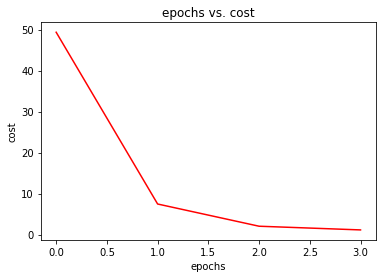

In [26]:
iters = np.arange(len(cost_steps_adag2))
plt.plot(iters, cost_steps_adag2, c='r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('epochs vs. cost');

### cost vs. theta_0 and theta_1

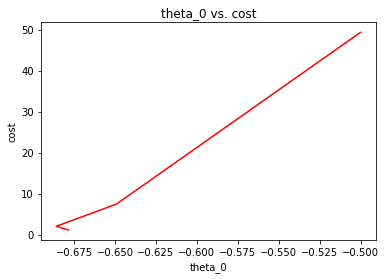

In [27]:
plt.plot(theta_steps_adag2[:,0], cost_steps_adag2, c='r')
plt.title('theta_0 vs. cost')
plt.xlabel('theta_0')
plt.ylabel('cost');

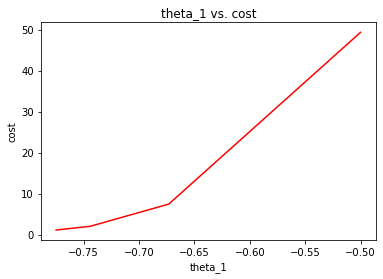

In [28]:
plt.plot(theta_steps_adag2[:,1], cost_steps_adag2, c='r')
plt.title('theta_1 vs. cost')
plt.xlabel('theta_1')
plt.ylabel('cost');

### predict all Lines with diffrent thetas

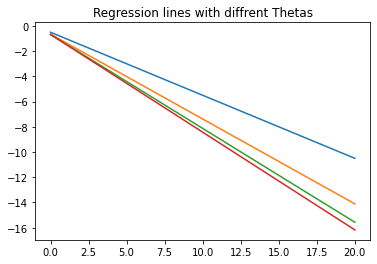

In [29]:
plot_lines(theta_steps_adag2)  # call the above function

### get the best RL

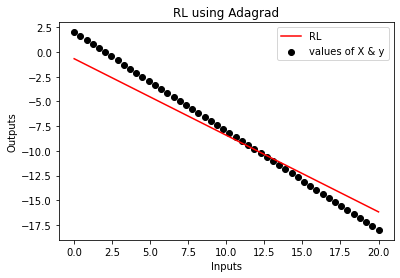

In [30]:
plt.scatter(X[:,1], y, c='k', label='values of X & y')
plt.plot(X[:,1], vals_adag2, c='r', label='RL')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('RL using Adagrad')
plt.legend();

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

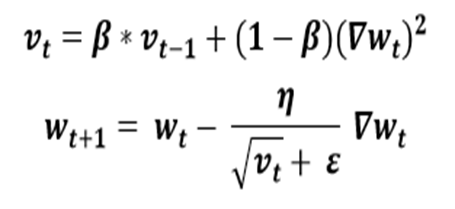

In [31]:
thetas_rms1 = np.zeros(2)

In [32]:
def RMSProp(X, y, theta_input, alfa, epsilon, beta):
    
    cost_steps = []
    theta_steps = []
    h_theta_rms = []
    
    vt = 0
    
    h_theta = X @ theta_input     

    loss = h_theta - y

    cost = np.sum(loss**2) / (2 * len(X))

    gradient = (X.T @ loss) / len(X)

    vt = beta * vt + (1 - beta) * gradient**2

    theta_input = theta_input - ((alfa * gradient) / (np.sqrt(vt)+epsilon))
    
    
    cost_steps.append(cost)
    theta_steps.append(theta_input)
    h_theta_rms.append(h_theta)
    
    while (gradient[0] > 0.01 or gradient[0] > -0.01) and (gradient[1] > 0.01 or gradient[1] > -0.01):
        
        h_theta = X @ theta_input     
        
        loss = h_theta - y
        
        cost = np.sum(loss**2) / (2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        vt = beta * vt + (1 - beta) * gradient**2
        
        theta_input = theta_input - ((alfa * gradient) / (np.sqrt(vt)+epsilon))
        
        # append in array
        cost_steps.append(cost)
        theta_steps.append(theta_input)
        h_theta_rms.append(h_theta)

    return theta_input, theta_steps, cost_steps, h_theta_rms

## trial 1 using RMSProp

In [33]:
# using alfa = 0.5 and epsilon = 1e-8 and beta = 0.4
thetas_rms1, theta_steps_rms1, cost_steps_rms1, h_thetas = RMSProp(X, y, thetas_rms1, 0.5, 1e-8, 0.9)

In [34]:
print('thetas_rms1 :', thetas_rms1)

thetas_rms1 : [-0.3513103  -0.43694614]


In [35]:
vals_rms1 = X @ thetas_rms1
vals_rms1

array([-0.3513103 , -0.52965566, -0.70800103, -0.88634639, -1.06469175,
       -1.24303711, -1.42138248, -1.59972784, -1.7780732 , -1.95641856,
       -2.13476392, -2.31310929, -2.49145465, -2.66980001, -2.84814537,
       -3.02649073, -3.2048361 , -3.38318146, -3.56152682, -3.73987218,
       -3.91821755, -4.09656291, -4.27490827, -4.45325363, -4.63159899,
       -4.80994436, -4.98828972, -5.16663508, -5.34498044, -5.5233258 ,
       -5.70167117, -5.88001653, -6.05836189, -6.23670725, -6.41505262,
       -6.59339798, -6.77174334, -6.9500887 , -7.12843406, -7.30677943,
       -7.48512479, -7.66347015, -7.84181551, -8.02016087, -8.19850624,
       -8.3768516 , -8.55519696, -8.73354232, -8.91188769, -9.09023305])

### r2 score

In [36]:
score_rms1 = r2_score(y, vals_rms1)
print('score_rms1 :', score_rms1)

score_rms1 : 0.3730211817627975


### cost vs. epochs

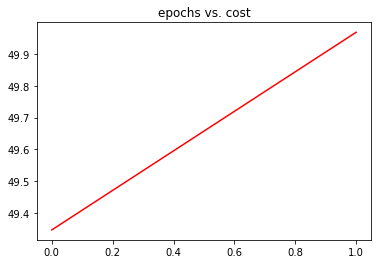

In [37]:
iters = np.arange(len(cost_steps_rms1))
plt.plot(iters, cost_steps_rms1, c='r')
plt.title('epochs vs. cost');

In [38]:
theta_steps_rms1 = np.asarray(theta_steps_rms1)

### cost vs. theta0 and theta1

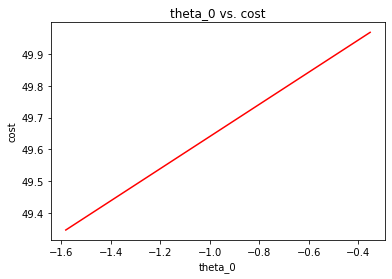

In [39]:
plt.plot(theta_steps_rms1[:,0], cost_steps_rms1, c='r')
plt.title('theta_0 vs. cost')
plt.xlabel('theta_0')
plt.ylabel('cost');

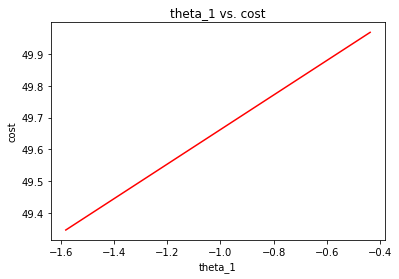

In [40]:
plt.plot(theta_steps_rms1[:,1], cost_steps_rms1, c='r')
plt.title('theta_1 vs. cost')
plt.xlabel('theta_1')
plt.ylabel('cost');

### plot  all R. Lines 

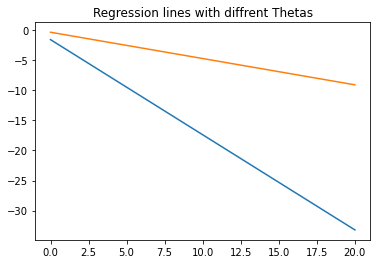

In [41]:
plot_lines(theta_steps_rms1)

###  best RL

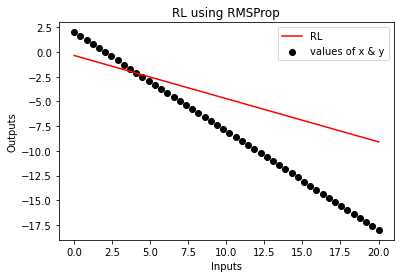

In [42]:
plt.scatter(X[:,1], y, c='k', label='values of x & y')
plt.plot(X[:,1], vals_rms1, c='r', label='RL')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('RL using RMSProp')
plt.legend();

## trial2 using RMSProp

In [43]:
thetas_rms2 = np.zeros(2)

In [44]:
# using alfa = 0.01 and epsilon = 1e-8 and beta = 0.9
thetas_rms2, theta_steps_rms2, cost_steps_rms2, h_thetas2 = RMSProp(X, y, thetas_rms2, 0.1, 1e-8, 0.9)

In [45]:
print('thetas_rms2 :', thetas_rms2)

thetas_rms2 : [-0.65958804 -0.76824002]


In [46]:
vals_rms2 = X @ thetas_rms2
vals_rms2

array([ -0.65958804,  -0.97315539,  -1.28672275,  -1.6002901 ,
        -1.91385745,  -2.22742481,  -2.54099216,  -2.85455952,
        -3.16812687,  -3.48169422,  -3.79526158,  -4.10882893,
        -4.42239629,  -4.73596364,  -5.049531  ,  -5.36309835,
        -5.6766657 ,  -5.99023306,  -6.30380041,  -6.61736777,
        -6.93093512,  -7.24450247,  -7.55806983,  -7.87163718,
        -8.18520454,  -8.49877189,  -8.81233924,  -9.1259066 ,
        -9.43947395,  -9.75304131, -10.06660866, -10.38017601,
       -10.69374337, -11.00731072, -11.32087808, -11.63444543,
       -11.94801278, -12.26158014, -12.57514749, -12.88871485,
       -13.2022822 , -13.51584955, -13.82941691, -14.14298426,
       -14.45655162, -14.77011897, -15.08368632, -15.39725368,
       -15.71082103, -16.02438839])

### r2 score2

In [47]:
score_rms2 = r2_score(y, vals_rms2)
print('score_rms2 :', score_rms2)   # ver good

score_rms2 : 0.9429162275323429


### cost vs. epochs

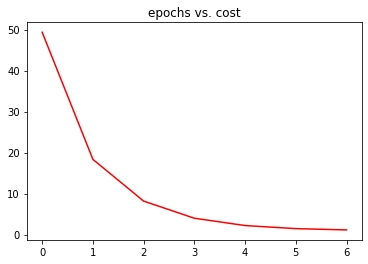

In [48]:
iters = np.arange(len(cost_steps_rms2))
plt.plot(iters, cost_steps_rms2, c='r')
plt.title('epochs vs. cost');

### cost vs. theta0 and theta1

In [49]:
theta_steps_rms2 = np.asarray(theta_steps_rms2)

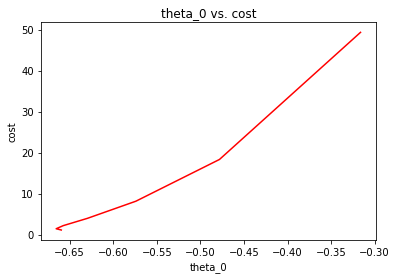

In [50]:
plt.plot(theta_steps_rms2[:,0], cost_steps_rms2, c='r')
plt.title('theta_0 vs. cost')
plt.xlabel('theta_0')
plt.ylabel('cost');

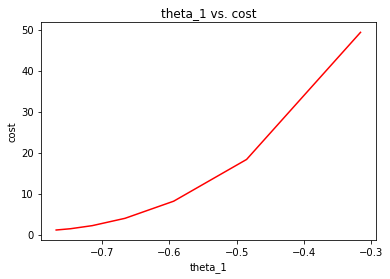

In [51]:
plt.plot(theta_steps_rms2[:,1], cost_steps_rms2, c='r')
plt.title('theta_1 vs. cost')
plt.xlabel('theta_1')
plt.ylabel('cost');

### get all R. Lines using diffrent thetas

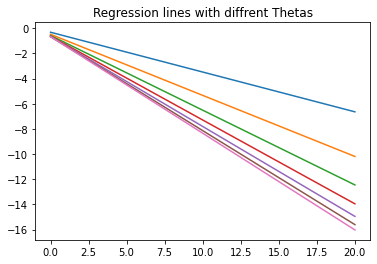

In [52]:
plot_lines(theta_steps_rms2)

### get the best RL

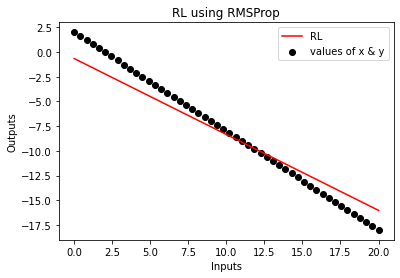

In [53]:
plt.scatter(X[:,1], y, c='k', label='values of x & y')
plt.plot(X[:,1], vals_rms2, c='r', label='RL')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('RL using RMSProp')
plt.legend();

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

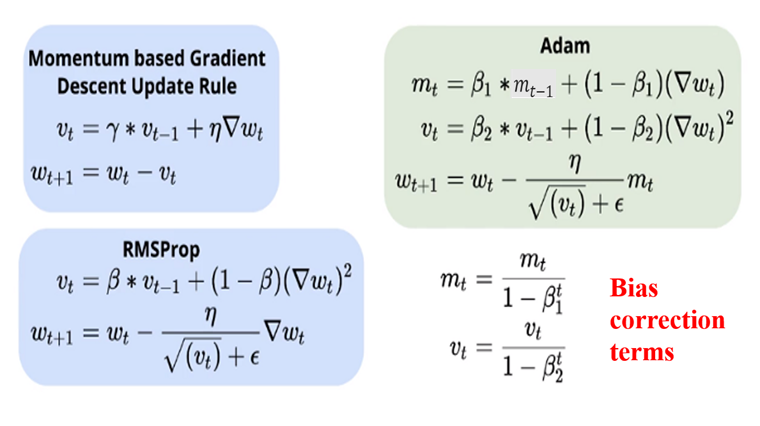

In [54]:
thetas_adam1 = np.zeros(2)

In [55]:
def Adam(X, y, theta_input, alfa, epsilon, beta1, beta2):
    
    cost_steps = []
    theta_steps = []
    h_thetas_steps = []
       
    vt = 0
    mt = 0
    i = 0

    h_theta = X @ theta_input     

    loss = h_theta - y

    cost = np.sum(loss**2) / (2 * len(X))

    gradient = (X.T @ loss) / len(X)

    mt = beta1 * mt + (1 - beta1) * gradient
    vt = beta2 * vt + (1 - beta2) * gradient**2

    mt_bias = mt / (1 - beta1**(i+1))
    vt_bias = vt / (1 - beta2**(i+1))

    theta_input = theta_input - ((alfa * mt_bias) / (np.sqrt(vt_bias)+epsilon))
    
    
    cost_steps.append(cost)
    theta_steps.append(theta_input)
    h_thetas_steps.append(h_theta)
    
   
    while (gradient[0] > 0.01 or gradient[0] > -0.01) and (gradient[1] > 0.01 or gradient[1] > -0.01):
        
        i+=1
        
        h_theta = X @ theta_input     
        
        loss = h_theta - y
        
        cost = np.sum(loss**2) / (2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        mt = beta1 * mt + (1 - beta1) * gradient
        vt = beta2 * vt + (1 - beta2) * gradient**2
        
        mt_bias = mt / (1 - beta1**(i+1))
        vt_bias = vt / (1 - beta2**(i+1))
        
        theta_input = theta_input - ((alfa * mt_bias) / (np.sqrt(vt_bias)+epsilon))
        
        # append in array
        cost_steps.append(cost)
        theta_steps.append(theta_input)
        h_thetas_steps.append(h_theta)

    
    return theta_input, theta_steps, cost_steps, h_thetas_steps

## trial1 using Adam

In [56]:
thetas_adam1, thetas_steps_adam1, cost_adam1, hypo_adam = Adam(X, y, thetas_adam1, 0.8, 1e-8, 0.2, 0.2)

In [57]:
print('thetas_adam1 :', thetas_adam1)

thetas_adam1 : [-0.95936381 -1.11142244]


In [58]:
vals_adam1 = X @ thetas_adam1
vals_adam1

array([ -0.95936381,  -1.41300563,  -1.86664744,  -2.32028925,
        -2.77393106,  -3.22757288,  -3.68121469,  -4.1348565 ,
        -4.58849831,  -5.04214013,  -5.49578194,  -5.94942375,
        -6.40306556,  -6.85670738,  -7.31034919,  -7.763991  ,
        -8.21763281,  -8.67127463,  -9.12491644,  -9.57855825,
       -10.03220006, -10.48584188, -10.93948369, -11.3931255 ,
       -11.84676731, -12.30040913, -12.75405094, -13.20769275,
       -13.66133456, -14.11497638, -14.56861819, -15.02226   ,
       -15.47590181, -15.92954363, -16.38318544, -16.83682725,
       -17.29046906, -17.74411088, -18.19775269, -18.6513945 ,
       -19.10503632, -19.55867813, -20.01231994, -20.46596175,
       -20.91960357, -21.37324538, -21.82688719, -22.280529  ,
       -22.73417082, -23.18781263])

### r2score

In [59]:
score_adam1 = r2_score(y, vals_adam1)
print('score_adam1 ', score_adam1)

score_adam1  0.5092839052440203


### cost vs. epochs

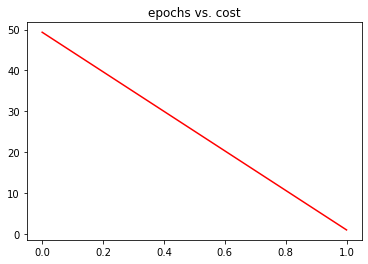

In [60]:
iters = np.arange(len(cost_adam1))
plt.plot(iters, cost_adam1, c='r')
plt.title('epochs vs. cost');

### cost vs. theta0 and theta1

In [61]:
thetas_steps_adam1 = np.asarray(thetas_steps_adam1)

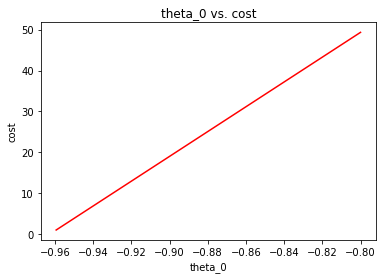

In [62]:
plt.plot(thetas_steps_adam1[:,0], cost_adam1, c='r')
plt.title('theta_0 vs. cost')
plt.xlabel('theta_0')
plt.ylabel('cost');

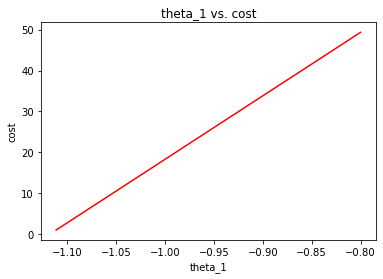

In [63]:
plt.plot(thetas_steps_adam1[:,1], cost_adam1, c='r')
plt.title('theta_1 vs. cost')
plt.xlabel('theta_1')
plt.ylabel('cost');

### get all R. Lines using diffrent thetas

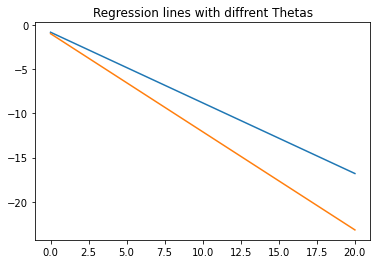

In [64]:
plot_lines(thetas_steps_adam1)

### get best RL

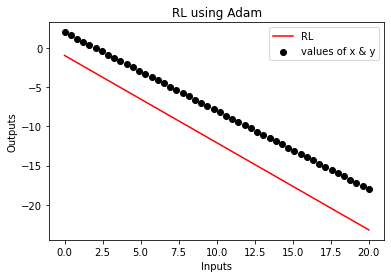

In [65]:
plt.scatter(X[:,1], y, c='k', label='values of x & y')
plt.plot(X[:,1], vals_adam1, c='r', label='RL')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('RL using Adam')
plt.legend();

## trial2 using Adam

In [66]:
thetas_adam2 = np.zeros(2)

In [67]:
thetas_adam2, thetas_steps_adam2, cost_adam2, hypo_adam2 = Adam(X, y, thetas_adam2, 0.018,1e-8, 0.9, 0.999)

In [68]:
print('thetas_adam2 :', thetas_adam2)

thetas_adam2 : [-0.69750907 -0.73922757]


In [69]:
vals_adam2 = X @ thetas_adam2
vals_adam2

array([ -0.69750907,  -0.99923461,  -1.30096014,  -1.60268568,
        -1.90441122,  -2.20613676,  -2.5078623 ,  -2.80958783,
        -3.11131337,  -3.41303891,  -3.71476445,  -4.01648998,
        -4.31821552,  -4.61994106,  -4.9216666 ,  -5.22339214,
        -5.52511767,  -5.82684321,  -6.12856875,  -6.43029429,
        -6.73201983,  -7.03374536,  -7.3354709 ,  -7.63719644,
        -7.93892198,  -8.24064752,  -8.54237305,  -8.84409859,
        -9.14582413,  -9.44754967,  -9.7492752 , -10.05100074,
       -10.35272628, -10.65445182, -10.95617736, -11.25790289,
       -11.55962843, -11.86135397, -12.16307951, -12.46480505,
       -12.76653058, -13.06825612, -13.36998166, -13.6717072 ,
       -13.97343273, -14.27515827, -14.57688381, -14.87860935,
       -15.18033489, -15.48206042])

In [70]:
score_adam2 = r2_score(y, vals_adam2)
print('score_adam2 ', score_adam2)   # exact

score_adam2  0.9317653834832161


### epochs vs. cost

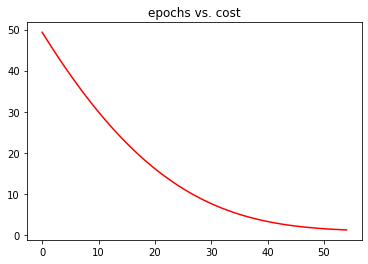

In [71]:
iters = np.arange(len(cost_adam2))
plt.plot(iters, cost_adam2, c='r')
plt.title('epochs vs. cost');

In [72]:
thetas_steps_adam2 = np.asarray(thetas_steps_adam2)

### cost vs. theta0 and theta1

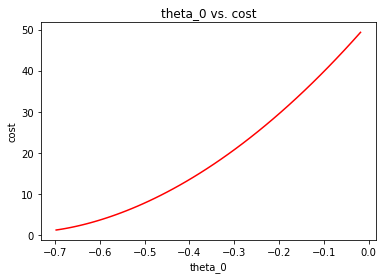

In [73]:
plt.plot(thetas_steps_adam2[:,0], cost_adam2, c='r')
plt.title('theta_0 vs. cost')
plt.xlabel('theta_0')
plt.ylabel('cost');

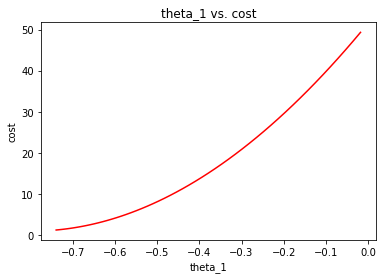

In [74]:
plt.plot(thetas_steps_adam2[:,1], cost_adam2, c='r')
plt.title('theta_1 vs. cost')
plt.xlabel('theta_1')
plt.ylabel('cost');

### get all R. Lines

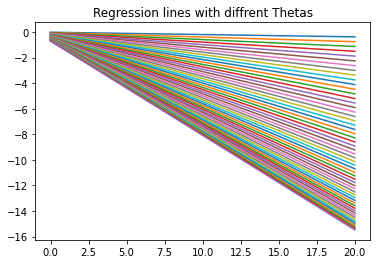

In [75]:
plot_lines(thetas_steps_adam2)

### best  R.L

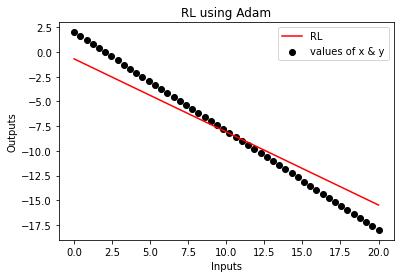

In [76]:
plt.scatter(X[:,1], y, c='k', label='values of x & y')
plt.plot(X[:,1], vals_adam2, c='r', label='RL')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('RL using Adam')
plt.legend();

# Compare the 3 Optimaizers

alfa = 0.1 
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999

### Adagrad

In [77]:
thetas_adag = np.zeros(2)

In [78]:
theta_adag, thetas_adag, cost_adag, hypo_adag = adagrad(X, y, thetas_adag, 0.1, 1e-8)

In [79]:
final_adag = X @ theta_adag

In [80]:
score1 = r2_score(y, final_adag)
print('score1 :', score1)

score1 : 0.9327601516399857


In [81]:
thetas_adag = np.asarray(thetas_adag)

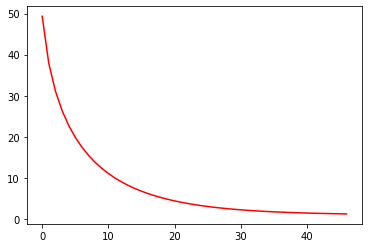

In [82]:
iters = np.arange(len(cost_adag))
plt.plot(iters, cost_adag, c='r');

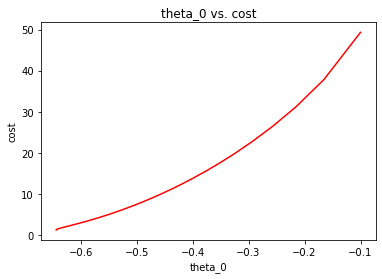

In [83]:
plt.plot(thetas_adag[:,0], cost_adag, c='r')
plt.title('theta_0 vs. cost')
plt.xlabel('theta_0')
plt.ylabel('cost');

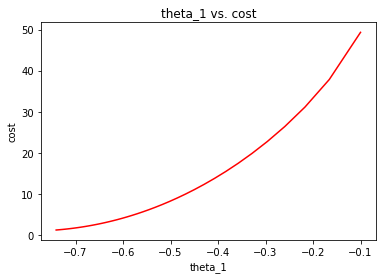

In [84]:
plt.plot(thetas_adag[:,1], cost_adag, c='r')
plt.title('theta_1 vs. cost')
plt.xlabel('theta_1')
plt.ylabel('cost');

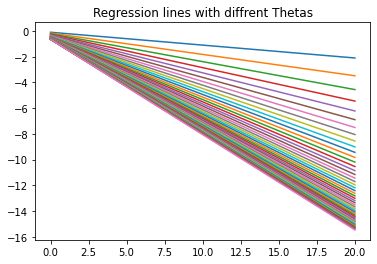

In [85]:
plot_lines(thetas_adag)

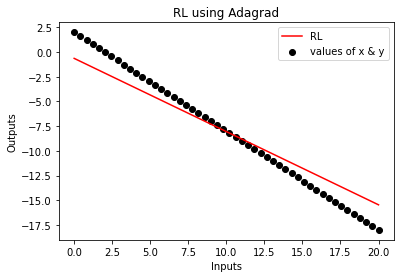

In [86]:
plt.scatter(X[:,1], y, c='k', label='values of x & y')
plt.plot(X[:,1], final_adag, c='r', label='RL')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('RL using Adagrad')
plt.legend();

## RMSProp

In [87]:
thetas_rms = np.zeros(2)

In [88]:
theta_rms, thetas_rms, cost_rms, hypo_rms = RMSProp(X, y, thetas_rms, 0.1, 1e-8, 0.999)

In [89]:
final_rms = X @ theta_rms

In [90]:
score2 = r2_score(y, final_rms)   # fail
print('score2 :', score2)

score2 : -0.82112006004685


In [91]:
thetas_rms = np.asarray(thetas_rms)

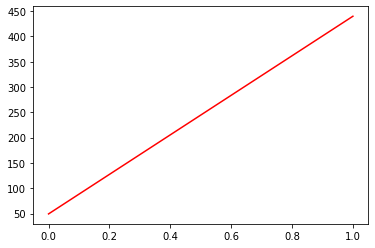

In [92]:
iters = np.arange(len(cost_rms))
plt.plot(iters, cost_rms, c='r');

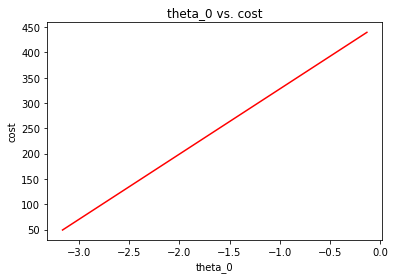

In [93]:
plt.plot(thetas_rms[:,0], cost_rms, c='r')
plt.title('theta_0 vs. cost')
plt.xlabel('theta_0')
plt.ylabel('cost');

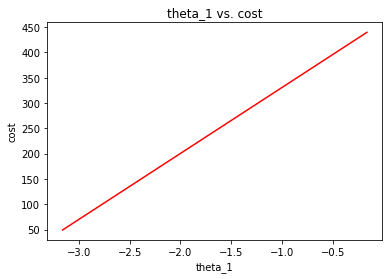

In [94]:
plt.plot(thetas_rms[:,1], cost_rms, c='r')
plt.title('theta_1 vs. cost')
plt.xlabel('theta_1')
plt.ylabel('cost');

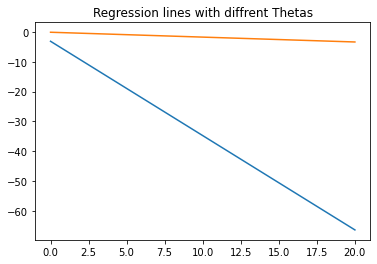

In [95]:
plot_lines(thetas_rms)

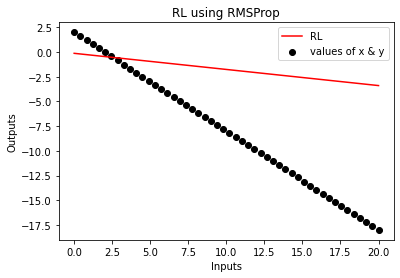

In [96]:
plt.scatter(X[:,1], y, c='k', label='values of x & y')
plt.plot(X[:,1], final_rms, c='r', label='RL')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('RL using RMSProp')
plt.legend();

## Adam

In [97]:
thetas_adam = np.zeros(2)

In [98]:
theta_adam, thetas_adam, cost_adam, hypo_adam = Adam(X, y, thetas_adam, 0.1, 1e-8, 0.9, 0.999)

In [99]:
final_adam = X @ theta_adam

In [100]:
score3 = r2_score(y, final_adam)   # good
print('score3 :', score3)

score3 : 0.9394432005281527


In [101]:
thetas_adam = np.asarray(thetas_adam)

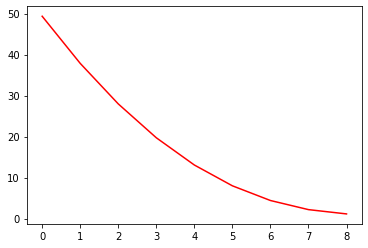

In [102]:
iters = np.arange(len(cost_adam))
plt.plot(iters, cost_adam, c='r');

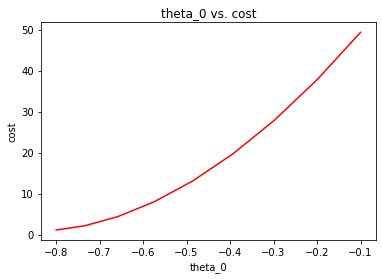

In [103]:
plt.plot(thetas_adam[:,0], cost_adam, c='r')
plt.title('theta_0 vs. cost')
plt.xlabel('theta_0')
plt.ylabel('cost');

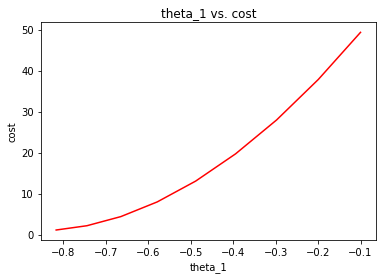

In [104]:
plt.plot(thetas_adam[:,1], cost_adam, c='r')
plt.title('theta_1 vs. cost')
plt.xlabel('theta_1')
plt.ylabel('cost');

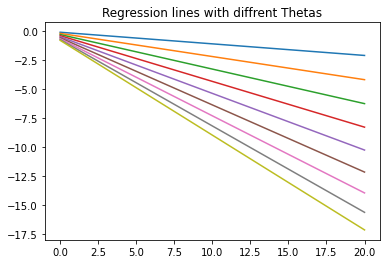

In [105]:
plot_lines(thetas_adam)

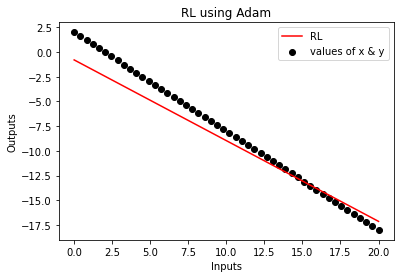

In [106]:
plt.scatter(X[:,1], y, c='k', label='values of x & y')
plt.plot(X[:,1], final_adam, c='r', label='RL')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('RL using Adam')
plt.legend();

## Scores

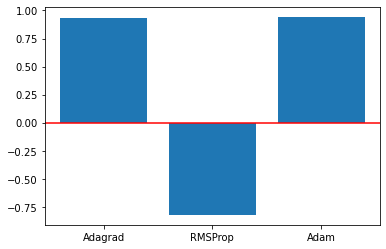

In [107]:
score = [score1, score2, score3]

name = ['Adagrad', 'RMSProp', 'Adam']

plt.axhline(0, c='r')
plt.bar(name, score);

## Congratulations 
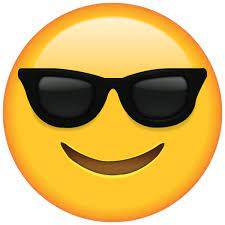